파이토치 공식문서 링크
https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html

---
# 파이토치 패키지 구성
```py
torch
# 메인 네임스페이스,
# Numpy와 유사한 구조를 가지고 있음
# 텐서를 비롯한 다양한 수학함수가 포함되어 있음
```

```py
torch.autograd
# 자동 미분을 위한 함수
```

```py
torch.nn
# 신경망을 구축하기 위한 다양한 데이터 구조나
# 레이어 등이 정의되어 있음
# 예를 들어, RNN같은 레이어, 렐루 함수같은 활성화 함수 등
```

```py
torch.optim
# 확률적 경사 하강법을 중심으로 한
# 파라미터 최적화 알고리즘
```

```py
torch.utils.data
# SGD의 반복 연산을 실행할 때 사용하는
# 유틸리티 함수가 포함되어 있음
```

```py
torch.onnx
# ONNX(Open Neural Network Exchange)의 포맷으로
# 모델을 익스포트 할 때 사용한다.
# 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용
```




---
# 벡터, 행렬, 텐서


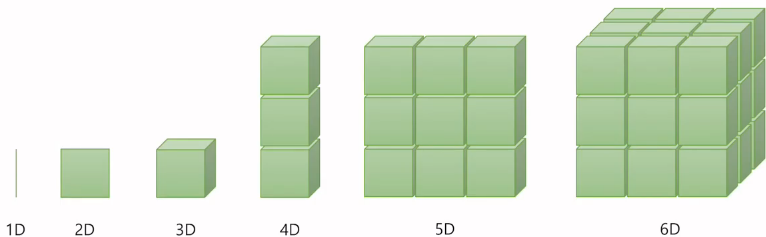

차원이 없는 값을 스칼라 (사진에 없음)  
1차원으로 구성된 값을 벡터  
2차원으로 구성된 값을 행렬  
3차원으로 구성된 값을 텐서라고 부른다.  
</br>
4차원 이상은 사진처럼 생각하는게 편하다.  

</br>
아래 데이터를 예시로 들자

```py
[[나는 사과를 좋아해], [나는 바나나를 좋아해],
[나는 사과를 싫어해], [나는 바나나를 싫어해]]
```

이거를 단어 단위로 나누어야 한다.

```py
[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'],
['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]
```

이제 각 단어를 벡터로 만들자  
각 단어는 다음의 규칙에 따라 벡터로 만든다.  

```py
'나는' = [0.1, 0.2, 0.9]
'사과를' = [0.3, 0.5, 0.1]
'바나나를' = [0.3, 0.5, 0.2]
'좋아해' = [0.7, 0.6, 0.5]
'싫어해' = [0.5, 0.6, 0.7]
```

이 기준에 따라 데이터를 재구성하면 아래와 같다.  

```py
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

```

이제 훈련 데이터는 4 X 4 X 3 의 크기를 가지는
3D 텐서다.  
batch size를 2로 해보자  

```py
# 첫번째 배치 #1
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

# 두번째 배치 #2
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]
```
컴퓨터는 연산 수행시 배치 단위로 가져가서 수행한다.  
그리고 지금 각 배치의 텐서 크기는  
2 X 3 X 3 이다.  
이는 (배치크기, 문장길이, 단어 벡터의 차원) 이다.  



---
# 넘파이로 텐서 만들기 (벡터와 행렬 만들기)

pyTorch로 텐서를 만들어보기 전에  
우선 Numpy로 텐서를 만들어보자  

</br>
우선 임포트부터 하자

In [ ]:
import numpy as np

Numpy로 텐서를 만다는 방법은 [숫자, 숫자, 숫자] 형태로 만들고  
이를 np.array()로 감싸주면 된다.

## 벡터 만들기
1차원 텐서인 벡터를 만들어보자

In [ ]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 List를 생성해서 np.array로 1차원 array로 변환함.
print(t)

[0. 1. 2. 3. 4. 5. 6.]


이 벡터의 차원과 크기를 출력해보자

In [ ]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


1차원 이므로 1이 출력된 모습이다.  
Shape는 크기를 말한다.  
위에서, 변수 t는 7개의 요소를 가졌으므로 7이다.  
즉 1 X 7 크기를 가진 벡터이다.  

## Numpy 기초
이제 Numpy에서 각 벡터의 원소에 접근해보자  
Numpy에서는 인덱스 0부터 시작한다.  


In [ ]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


인덱스로 접근한 모습, -1은 뒤를 기준으로 한 인덱스이다.  


In [ ]:
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) # [시작 번호 : 끝 번호]로 범위 지정을 통해 가져온다.

t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


2번 인덱스부터 5번 인덱스까지의 값을 가져온다.  
또, 4번 인덱스에서 마지막 인덱스까지의 값을 가져온다.  
이렇게 범위로 가져오는 것을 슬라이싱이라고 한다.  

In [ ]:
print('t[:2] t[3:]     = ', t[:2], t[3:]) # 시작 번호를 생략한 경우와 끝 번호를 생략한 경우

t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


시작부분부터  2번 인덱스까지 값을 가져온다.  
또, 3번 인덱스에서 마지막까지 값을 가져온다.  

## 2차원 행렬 만들기


In [ ]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


위 코드에서, 4행 3열 크기의 행렬을 만들었다.  
아까와는 다르게, 차원은 2가 출력되며  
크기는 4, 3이 나온다.  

</br>

Numpy로도 3차원 텐서를 만들 수는 있다.  
그러나 이것은 PyTorch로 넘어가서 하자

---
# PyTorch로 텐서 선언하기

파이토치는 넘파이와 유사하나 더 나은 부분이 많다.  
우선 임포트부터 하자

In [ ]:
import torch

## PyTorch로 벡터 만들기 (1차원)


In [ ]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


아까와 같은 형태로 만들었다.  
차원값은 1, 길이가 7이므로 크기도 7이 나온다.  
Numpy처럼 인덱스접근, 슬라이싱을 해보자

In [ ]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


##PyTorch로 행렬 만들기 (2차원)

In [ ]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


마찬가지로 차원값은 2가 나온다.  
크기는 4 X 3이 나왔다.  
슬라이싱을 해보자

In [ ]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


첫 번째 차원을 전체 선택했다는 것은 행을 전부 선택한다는 뜻이다.  
그 상황에서 두 번째 차원 (1)을 가져오므로 2번재 새로줄(열) 값을 가져온다.  
고로 2, 5, 8, 11 이 나온다.  

</br>

이 경우, 값이 4개가 나왔으므로 크기도 4가 된다.

In [ ]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


위 코드는 첫 번째 차원을 전체 선택하고 맨 마지막에서  
첫 번째를 제외하고 다 가져온다.

---
# 브로드 캐스팅

행렬간에 덧셈과 뺄셈을 할 때는 두 행렬 A, B의 크기가 같아야 한다.  
곱셉을 할때는 A의 마지막 차원과 B의 첫 차원이 일치해야 한다.  

</br>

그러나 딥러닝을 하다보면 불가피하게 크기가 다른 행렬이나  
텐서에 대해 사칙 연산을 수행할 필요가 있는 경우가 있다.  
이때, 자동으로 크기를 맞춰서 연산을 수행하는 것이 바로  
브로드캐스팅이다.  

In [ ]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


크기가 같을 때는 덧셈이 정상적으로 이루어 진다.

In [ ]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])
print(m1 + m2)

tensor([[4., 5.]])


크기가 다르지만 브로드 캐스팅을 통해 계산이 이루어졌다.  


In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


m1은 (1, 2), m2의 크기는 (2, 1)이다.  
수학적으로 덧셈이 불가능 하지만 파이토치는 두 벡터의 크기를  
(2, 2)로 변경하여 덧셈을 수행했다.  
실제로는 아래의 과정을 거쳤다.
```py
[1, 2]
==> [[1, 2],
     [1, 2]]
[3]
[4]
==> [[3, 3],
     [4, 4]]
```

브로드 캐스팅은 편리하지만 자동이기 때문에 주의해서 사용해야 한다.  

---
# 자주 사용되는 기능

## 행렬 곱셈과 원소별 곱셈

먼저 행렬곱셈을 보자  
행렬곱셈은 matmul()을 통해 수행한다.

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


2 X 2 행렬과 2 X 1 행렬(벡터)의 곱셈 결과를 보여준다.  
평범한 행렬 곱셈이다.  

</br>

element-wise 곱셈이란게 존재한다.  
이것은 동일한 크기의 행렬이 동일한 위치에 있는 원소끼리 곱하는 것이다.  
이는 * 또는 mul()을 통해 수행한다.  
위와 같은 데이터로 연산해보자

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


분명 크기가 달랐지만 브로드 캐스팅으로 크기가 변한 다음  
곱셈이 수행되어 둘 다 2 X 2 크기가 되었다.

이 과정에서 m2 텐서가 어떻게 변했는지 보자

```py
[1]
[2]
==> [[1, 1],
     [2, 2]]
```


## 평균
평균을 구해보자  
.mean()을 사용하여 구현할 수 있다.

In [ ]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


1과 2의 평균값이 구해졌다.  
이번엔 2차원 행렬로 구현해보자  

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.mean())

tensor(2.5000)


1, 2, 3, 4의 평균 값이 출력되었다.  

In [ ]:
print(t.mean(dim=0))

tensor([2., 3.])


dim = 0이라는 것은 첫 번째 차원을 말한다.  
행렬에서는 행을 의미한다.  
즉, 행이라는 개념을 없애고 열만 남기므로 벡터가 된다.  
연산 과정은 다음과 같다.  

```py
# 실제 연산 과정
t.mean(dim=0)은 입력에서 첫번째 차원을 제거한다.

[[1., 2.],
 [3., 4.]]

1과 3의 평균을 구하고, 2와 4의 평균을 구한다.
결과 ==> [2., 3.]
```

이번에는 dim = 1 을 줘보자

In [ ]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


열이라는 차원이 제거되어야 한다.  
즉, (1, 2)크기가 되었던 아까와는 다르게 (2, 1) 크기가 되야 한다.  
연산결과는 아래와 같다.  
```py
# 실제 연산 결과는 (2 × 1)
[1. 5]
[3. 5]
```
마찬가지로 평균 계산이 도입되었다.  


In [ ]:
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


이번에는 -1을 주었다.  
사실상 1을 넣은것과 다를 바 없다.

## 덧셈
말 그대로 덧셈이다.

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


순서대로  
"원소 내부의 숫자를 모두 더함"  
"행을 없애면서 열끼리 값을 더함"  
"열을 없애면서 행끼리 값을 더함"  
"위와 동일"  
이다.  

## 최대와 아그맥스
Max는 최대값을, ArgMax는 최대값을 가진 인덱스를 반환한다.  

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.max()) # Returns one value: max

tensor(4.)


t에서 가장 높은 값은 4다.  
이번엔 첫번째 차원을 없애보자

In [ ]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


행을 제거하면서 [3, 4] 라는 벡터가 만들어졌다.  
그런데 [1, 1]도 같이 반환되는데 이는 max에 dim을 주면  
argmax도 같이 리턴되기 때문이다.  
어떤 의미인지는 아래를 참고

```py
# [1, 1]가 무슨 의미인지 보자
[[1, 2],
 [3, 4]]
첫번째 열에서 0번 인덱스는 1, 1번 인덱스는 3이다.
두번째 열에서 0번 인덱스는 2, 1번 인덱스는 4이다.
다시 말해 3과 4의 인덱스는 [1, 1]이다.
```

만약 max 또는 argmax만 리턴받고 싶다면 리턴 값에  
인덱스를 부여하면 된다.  

In [ ]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


이번에는 dim=1로 인자를 주었을 때와 dim=-1로 인자를 주었을 때를 보자

In [ ]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
